# MGTA453 Case Study 2 - Shared Social Responsibility

In [57]:
from scipy import stats
import pandas as pd
import numpy as np
import pyrsm as rsm

In [58]:
df1 = pd.read_csv('Sales.csv')
df = pd.read_csv('NYOP.csv')

## Flat Rate Pricing

#### Null Hypothesis (H0):
The null hypothesis states that there is no difference between the proportion of purchases under the two pricing conditions.
    p_FR = p_FR_Charity
​
#### Alternative Hypothesis (Ha):
The alternative hypothesis states that there is a difference between the two proportions
    p_FR != p_FR_Charity

In [59]:
# Question a

Null_hypothesis = "No difference in the proportion of purchases ( Ho: p1 = p2)"
Alternate_hypothesis = "There is a difference in the proportion of purchases ( Ho: p1 != p2)"

print('a. Null Hypothesis:', Null_hypothesis)
print('   Alternate Hypothesis:', Alternate_hypothesis)

# Question b

# total number of purchases (NumberSold)
FR_sold = df1[df1['Condition'] == 'FR']['NumberSold'].sum()
FR_Charity_sold  = df1[df1['Condition'] == 'FR Charity']['NumberSold'].sum()

# total number of riders (Riders) for each condition
FR_riders = df1[df1['Condition'] == 'FR']['Riders'].sum()
FR_Charity_riders = df1[df1['Condition'] == 'FR Charity']['Riders'].sum()

# Calculate proportions for FR and FR Charity
p1 = FR_sold / FR_riders  # Proportion for FR
p2 = FR_Charity_sold/ FR_Charity_riders  # Proportion for FR Charity

# Sample sizes (total riders)
n1 = FR_riders
n2 = FR_Charity_riders

x = (p1*(1-p1))/n1
y = (p2*(1-p2))/n2

z_stat = (p1-p2)/ np.sqrt(x+y)
print("b. z_stat :", z_stat)

# Question c
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print("c. p_value :", p_value)

# Question d

alpha = 0.05 #Significance level
if p_value < alpha:
    print(f"d. At the {alpha} significance level, we reject null hypothesis. There is a difference in the proportion of purchases ( Ho: p1 = p2) ")
else:
    print(f"d. At the {alpha} significance level, we accept null hypothesis. There is No difference in the proportion of purchases ( Ho: p1 != p2) ")

a. Null Hypothesis: No difference in the proportion of purchases ( Ho: p1 = p2)
   Alternate Hypothesis: There is a difference in the proportion of purchases ( Ho: p1 != p2)
b. z_stat : -1.5264554280529021
c. p_value : 0.12689648269385967
d. At the 0.05 significance level, we accept null hypothesis. There is No difference in the proportion of purchases ( Ho: p1 != p2) 


## NYOP Pricing

### Part 1

#### Null Hypothesis (H0):
The null hypothesis states that there is no difference between the proportion of purchases under the two pricing conditions.
    p_NYOP = p_NYOP_Charity
​
#### Alternative Hypothesis (Ha):
The alternative hypothesis states that there is a difference between the two proportions
    p_NYOP != p_NYOP_Charity

In [60]:
# Question a

Null_hypothesis = "No difference in the proportion of purchases ( Ho: p1 = p2)"
Alternate_hypothesis = "There is a difference in the proportion of purchases ( Ho: p1 != p2)"

print('a. Null Hypothesis:', Null_hypothesis)
print('   Alternate Hypothesis:', Alternate_hypothesis)

# Question b

# total number of purchases (NumberSold)
NYOP_sold = df1[df1['Condition'] == 'NYOP']['NumberSold'].sum()
NYOP_Charity_sold  = df1[df1['Condition'] == 'NYOP Charity']['NumberSold'].sum()

# total number of riders (Riders) for each condition
NYOP_riders = df1[df1['Condition'] == 'NYOP']['Riders'].sum()
NYOP_Charity_riders = df1[df1['Condition'] == 'NYOP Charity']['Riders'].sum()

# Calculate proportions for NYOP and NYOP Charity
p1 = NYOP_sold / NYOP_riders  # Proportion for NYOP
p2 = NYOP_Charity_sold/ NYOP_Charity_riders  # Proportion for NYOP Charity

# Sample sizes (total riders)
n1 = NYOP_riders
n2 = NYOP_Charity_riders

x = (p1*(1-p1))/n1
y = (p2*(1-p2))/n2

z_stat = (p1-p2)/ np.sqrt(x+y)
print("b. z_stat :", z_stat)

# Question c
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print("c. p_value :", p_value)

# Question d

alpha = 0.05 #Significance level
if p_value < alpha:
    print(f"d. At the {alpha} significance level, we reject null hypothesis. There is a difference in the proportion of purchases ( Ho: p1 = p2) ")
else:
    print(f"d. At the {alpha} significance level, we accept null hypothesis. There is No difference in the proportion of purchases ( Ho: p1 != p2) ")
    


a. Null Hypothesis: No difference in the proportion of purchases ( Ho: p1 = p2)
   Alternate Hypothesis: There is a difference in the proportion of purchases ( Ho: p1 != p2)
b. z_stat : 22.749707261972425
c. p_value : 0.0
d. At the 0.05 significance level, we reject null hypothesis. There is a difference in the proportion of purchases ( Ho: p1 = p2) 


### Part 2

In [61]:
#a.
df['UnitPrice'] = df['Price'] / df['Number']
df['Number'] = df['Number'].astype('category')


In [62]:
#b.
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Box Plot of UnitPrice vs Number')

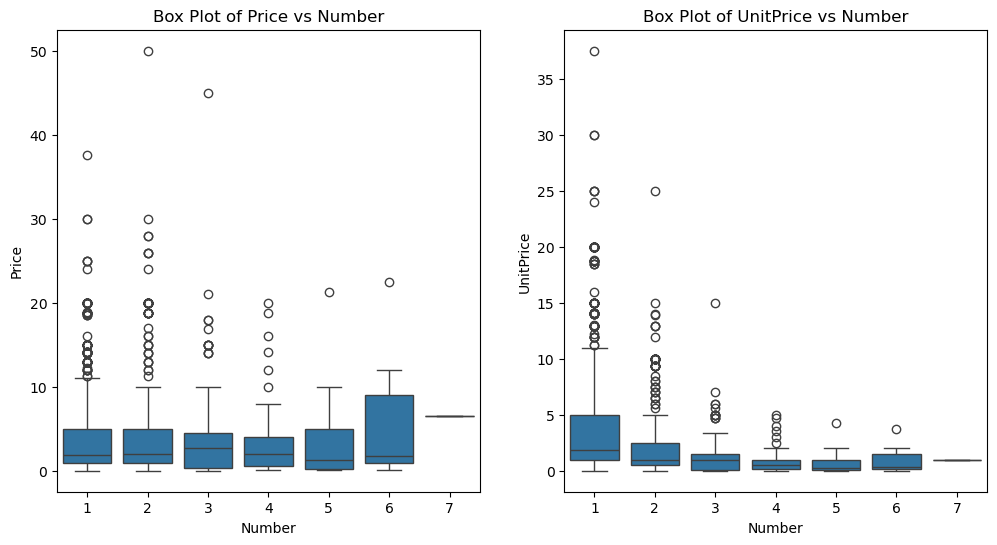

In [63]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Number', y='Price', data = df)
plt.title('Box Plot of Price vs Number')

plt.subplot(1, 2, 2)
sns.boxplot(x='Number', y='UnitPrice', data = df)
plt.title('Box Plot of UnitPrice vs Number')

b. 

For each number of photos purchased, the median price remains relatively consistent. However, the interquartile range seems to increase slightly for larger numbers of photos purchased.
There are multiple outliers present at higher prices, particularly for smaller numbers of photos purchased. This suggests that while the majority of riders are choosing lower prices, a few are willing to pay significantly more.

As the number of photos purchased increases, the median unit price decreases.
The variation in UnitPrice is more prominent when the number of photos is small. As the number of photos increases, the variability in UnitPrice decreases. There are fewer outliers for higher numbers of photos, indicating more consistent pricing behavior.

The plots suggest that participants who buy more photos tend to pay lower prices per photo. Additionally, the presence of significant outliers in both plots indicates variability in what riders are willing to pay.

In [64]:
#c.
from scipy import stats

nyop_avg = df[df['Condition'] == 'NYOP']['UnitPrice'].mean()
charity_avg = df[df['Condition'] == 'NYOP Charity']['UnitPrice'].mean()

print(f"Average Unit Price for NYOP: {nyop_avg}")
print(f"Average Unit Price for NYOP Charity: {charity_avg}")

Average Unit Price for NYOP: 1.0404387568555757
Average Unit Price for NYOP Charity: 5.6804804392587505


In [65]:
nyop_prices = df[df['Condition'] == 'NYOP']['UnitPrice']
charity_prices = df[df['Condition'] == 'NYOP Charity']['UnitPrice']

t_stat, p_value = stats.ttest_ind(nyop_prices, charity_prices, equal_var = False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -36.67572819347889
P-value: 3.954550853548612e-216


In [66]:
if p_value < 0.05:
    print("The difference in average unit prices is statistically significant.")
else:
    print("The difference in average unit prices is not statistically significant.")

The difference in average unit prices is statistically significant.


d. 

Null Hypothesis (Ho): The average unit prices for NYOP and NYOP Charity are the same.

Alternative Hypothesis (Ha): The average unit prices for NYOP and NYOP Charity are different.

In [67]:
#e.
cm = rsm.basics.compare_means({"nyop":df}, var1 = 'Condition', var2 = 'Price', alt_hyp = 'two-sided', conf = 0.95, sample_type = 'independent')
comparison_summary = cm.summary(extra = True)
print(comparison_summary)


Pairwise mean comparisons (t-test)
Data      : nyop
Variables : Condition, Price
Samples   : independent
Confidence: 0.95
Adjustment: None
   Condition  mean    n  n_missing    sd    se    me
        NYOP 1.326 1641          0 1.622 0.040 0.079
NYOP Charity 6.600 1457          0 5.586 0.146 0.287
          Null hyp.                      Alt. hyp.   diff p.value    se  t.value       df   2.5%  97.5%    
NYOP = NYOP Charity NYOP not equal to NYOP Charity -5.274  < .001 0.152  -34.765 1673.816 -5.572 -4.977 ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
None


As the p-value is less than 0.001, which is far below the 0.05 significance level, we can reject the null hypothesis.

Since the p-value is extremely small (< 0.001), the likelihood of committing a Type I error is very low. 

We have rejected the null hypothesis,  we are not going to make a Type II error in this scenario.



In [68]:
#f.
one_picture_df = df[df['Number'] == 1]
six_pictures_df = df[df['Number'] == 6]

nyop_prices_1 = one_picture_df[one_picture_df['Condition'] == 'NYOP']['UnitPrice']
charity_prices_1 = one_picture_df[one_picture_df['Condition'] == 'NYOP Charity']['UnitPrice']

t_stat_1, p_value_1 = stats.ttest_ind(nyop_prices_1, charity_prices_1, equal_var=False)

print("Analysis for people who purchased 1 picture:")
print(f"T-statistic: {t_stat_1}")
print(f"P-value: {p_value_1}")
if p_value_1 < 0.05:
    print("The difference in average unit prices for 1 picture is statistically significant.\n")
else:
    print("The difference in average unit prices for 1 picture is not statistically significant.\n")


Analysis for people who purchased 1 picture:
T-statistic: -32.7550231572129
P-value: 1.0349726619595065e-175
The difference in average unit prices for 1 picture is statistically significant.



In [69]:
nyop_prices_6 = six_pictures_df[six_pictures_df['Condition'] == 'NYOP']['UnitPrice']
charity_prices_6 = six_pictures_df[six_pictures_df['Condition'] == 'NYOP Charity']['UnitPrice']

t_stat_6, p_value_6 = stats.ttest_ind(nyop_prices_6, charity_prices_6, equal_var=False)

print("Analysis for people who purchased 6 pictures:")
print(f"T-statistic: {t_stat_6}")
print(f"P-value: {p_value_6}")
if p_value_6 < 0.05:
    print("The difference in average unit prices for 6 pictures is statistically significant.\n")
else:
    print("The difference in average unit prices for 6 pictures is not statistically significant.\n")

Analysis for people who purchased 6 pictures:
T-statistic: -1.3830917803702296
P-value: 0.2884114566627224
The difference in average unit prices for 6 pictures is not statistically significant.



f. 
For People Who Purchased 1 Picture:
The large difference in mean prices and the extremely low p-value suggest a highly significant effect of the charity condition on the unit price when people are purchasing just 1 picture. Customers are willing to pay considerably more under the NYOP Charity condition, indicating a strong response to the charitable incentive.

For People Who Purchased 6 Pictures:
Although the mean unit prices show a higher amount under the charity condition, the p-value of 0.288 indicates that this difference is not statistically significant at common significance levels (such as 0.05). This suggests that for customers purchasing in bulk (6 pictures), the charity incentive does not have as strong of an impact on the unit price as it does for those purchasing a single picture.
For customers buying 6 pictures, the charity effect is weaker, potentially due to bulk pricing or a diminishing marginal willingness to pay extra for each additional picture.

In [70]:
nyop_data = pd.read_csv('NYOP.csv')

nyop_data['UnitPrice'] = nyop_data['Price'] / nyop_data['Number']

nyop_data['Number'] = nyop_data['Number'].astype('category')

print(nyop_data.head())

  Condition Number  Price  UnitPrice
0      NYOP      1   1.00       1.00
1      NYOP      1   1.00       1.00
2      NYOP      1   0.01       0.01
3      NYOP      1   0.10       0.10
4      NYOP      1   0.01       0.01


In [71]:
#g)
import numpy as np
from scipy import stats

six_picture_data = nyop_data[nyop_data['Number'] == 6]

mean_nyop = np.mean(six_picture_data[six_picture_data['Condition'] == 'NYOP']['UnitPrice'])
mean_charity = np.mean(six_picture_data[six_picture_data['Condition'] == 'NYOP Charity']['UnitPrice'])

var_nyop = np.var(six_picture_data[six_picture_data['Condition'] == 'NYOP']['UnitPrice'], ddof=1)
var_charity = np.var(six_picture_data[six_picture_data['Condition'] == 'NYOP Charity']['UnitPrice'], ddof=1)

n_nyop = len(six_picture_data[six_picture_data['Condition'] == 'NYOP'])
n_charity = len(six_picture_data[six_picture_data['Condition'] == 'NYOP Charity'])

se_nyop = var_nyop / n_nyop
se_charity = var_charity / n_charity

se_pooled = np.sqrt(se_nyop + se_charity)

t_stat = (mean_nyop - mean_charity) / se_pooled

df = ((se_nyop + se_charity) ** 2) / (((se_nyop ** 2) / (n_nyop - 1)) + ((se_charity ** 2) / (n_charity - 1)))

p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df))

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {df}")

T-statistic: -1.3830917803702296
P-value: 0.2884114566627223
Degrees of freedom: 2.238711549258564


g) The Python computation of the t-test using scipy.stats.ttest_ind() follows the exact same statistical principles as the manual calculation. As long as there are no rounding errors or discrepancies in the data used, the manual calculation should yield a similar t-statistic.

## Economics

In [72]:
import pandas as pd

# Load the CSV files into DataFrames
nyop_df = pd.read_csv('NYOP.csv')
sales_df = pd.read_csv('Sales.csv')

# Display the first few rows of each DataFrame
sales_df.head()

,Condition,NumberSold,Riders,MerchandiseRevenues
0,FR,77,12663,4592.41
1,FR,63,15561,6688.57
2,FR Charity,79,14796,6476.78
3,FR Charity,101,15796,5845.94
4,NYOP,1137,14077,4845.27


In [73]:
import pandas as pd

# Cost and price per unit
unit_cost = 1.20
flat_price = 12.95


grouped_sales = sales_df.groupby('Condition').agg({
    'NumberSold': 'sum',
    'Riders': 'mean',
    'MerchandiseRevenues': 'mean'
}).reset_index()

grouped_sales['NumberDay'] = sales_df.groupby('Condition')['Condition'].count().values

grouped_nyop = nyop_df.groupby('Condition')['Price'].sum().reset_index()

grouped_sales = pd.merge(grouped_sales, grouped_nyop, on='Condition', how='left')

grouped_sales['TotalRevenue'] = grouped_sales.apply(
    lambda row: row['NumberSold'] * flat_price if 'FR' in row['Condition'] else row['Price'],
    axis=1
)

grouped_sales['TotalCost'] = grouped_sales['NumberSold'] * unit_cost

grouped_sales['Profit'] = grouped_sales['TotalRevenue'] - grouped_sales['TotalCost']

grouped_sales['AverageDailyProfit'] = grouped_sales['Profit'] / grouped_sales['NumberDay']

print(grouped_sales[['Condition', 'NumberSold', 'Riders', 'MerchandiseRevenues', 'TotalRevenue', 'TotalCost', 'Profit', 'AverageDailyProfit']])

      Condition  NumberSold   Riders  MerchandiseRevenues  TotalRevenue  \
0            FR         140  14112.0              5640.49       1813.00   
1    FR Charity         180  15296.0              6161.36       2331.00   
2          NYOP        2370  14131.5              5941.95       2175.80   
3  NYOP Charity        1793  14695.0              6750.50       9616.31   

   TotalCost   Profit  AverageDailyProfit  
0      168.0  1645.00          822.500000  
1      216.0  2115.00         1057.500000  
2     2844.0  -668.20         -334.100000  
3     2151.6  7464.71         2488.236667  


In [74]:
total_profit = grouped_sales.groupby('Condition')['Profit'].sum().sort_values(ascending=False)

print(total_profit)

Condition
NYOP Charity    7464.71
FR Charity      2115.00
FR              1645.00
NYOP            -668.20
Name: Profit, dtype: float64


The most profitable strategy is FR. The ranking is 1. NYOP Charity , 2. FR Charity, 3. FR, and 4. NYOP

Question c

In [75]:
import pandas as pd

charity_conditions = sales_df[sales_df['Condition'].isin(['FR Charity', 'NYOP Charity'])].copy()

charity_conditions.loc[:, 'CharityDonation'] = charity_conditions['MerchandiseRevenues'] * 0.5

charity_conditions.loc[:, 'ThemeParkEarnings'] = charity_conditions['MerchandiseRevenues'] * 0.5

charity_conditions.loc[:, 'TotalSocietalProfits'] = charity_conditions['CharityDonation'] + charity_conditions['ThemeParkEarnings']

total_societal_profits = charity_conditions.groupby('Condition')[['CharityDonation', 'ThemeParkEarnings', 'TotalSocietalProfits']].sum()

ranked_societal_profits = total_societal_profits.sort_values(by='TotalSocietalProfits', ascending=False)

print(ranked_societal_profits)

              CharityDonation  ThemeParkEarnings  TotalSocietalProfits
Condition                                                             
NYOP Charity         10125.75           10125.75              20251.50
FR Charity            6161.36            6161.36              12322.72


Question d

In [76]:
import pandas as pd

def calculate_average_charity_park_earnings(sales_df):
    sales_df['CharityEarnings'] = sales_df.apply(
        lambda row: row['MerchandiseRevenues'] * 0.5 if 'Charity' in row['Condition'] else 0,
        axis=1
    )
    
    sales_df['ThemeParkEarnings'] = sales_df.apply(
        lambda row: row['MerchandiseRevenues'] * 0.5 if 'Charity' in row['Condition'] else row['MerchandiseRevenues'],
        axis=1
    )
    
    charity_df = sales_df[sales_df['Condition'].isin(['FR Charity', 'NYOP Charity'])]

    total_earnings = charity_df.groupby('Condition')[['CharityEarnings', 'ThemeParkEarnings']].sum()

    condition_counts = charity_df['Condition'].value_counts()

    average_daily_earnings = total_earnings.div(condition_counts, axis=0)

    yearround_earnings = average_daily_earnings * 365

    return yearround_earnings

yearround_earnings = calculate_average_charity_park_earnings(sales_df)

print(yearround_earnings)

              CharityEarnings  ThemeParkEarnings
Condition                                       
FR Charity         1124448.20         1124448.20
NYOP Charity       1231966.25         1231966.25


e. Are merchandise sales a concern?

In [77]:
import pandas as pd
from scipy import stats

# Assuming you have a DataFrame 'sales_df' with the columns: Condition, NumberSold, Riders, MerchandiseRevenues

# Step 1: Split the data into different conditions
fr = sales_df[sales_df['Condition'] == 'FR']['MerchandiseRevenues']
fr_charity = sales_df[sales_df['Condition'] == 'FR Charity']['MerchandiseRevenues']
nyop = sales_df[sales_df['Condition'] == 'NYOP']['MerchandiseRevenues']
nyop_charity = sales_df[sales_df['Condition'] == 'NYOP Charity']['MerchandiseRevenues']

# Step 2: Perform pairwise t-tests for comparing means
results = {}

# FR vs FR Charity
t_stat, p_value = stats.ttest_ind(fr, fr_charity, equal_var=False)
results['FR vs FR Charity'] = (t_stat, p_value)

# FR vs NYOP
t_stat, p_value = stats.ttest_ind(fr, nyop, equal_var=False)
results['FR vs NYOP'] = (t_stat, p_value)

# FR vs NYOP Charity
t_stat, p_value = stats.ttest_ind(fr, nyop_charity, equal_var=False)
results['FR vs NYOP Charity'] = (t_stat, p_value)

# FR Charity vs NYOP
t_stat, p_value = stats.ttest_ind(fr_charity, nyop, equal_var=False)
results['FR Charity vs NYOP'] = (t_stat, p_value)

# FR Charity vs NYOP Charity
t_stat, p_value = stats.ttest_ind(fr_charity, nyop_charity, equal_var=False)
results['FR Charity vs NYOP Charity'] = (t_stat, p_value)

# NYOP vs NYOP Charity
t_stat, p_value = stats.ttest_ind(nyop, nyop_charity, equal_var=False)
results['NYOP vs NYOP Charity'] = (t_stat, p_value)

# Step 3: Print the results
for comparison, (t_stat, p_value) in results.items():
    print(f"{comparison}: t-statistic = {t_stat:.2f}, p-value = {p_value:.3f}")


FR vs FR Charity: t-statistic = -0.48, p-value = 0.707
FR vs NYOP: t-statistic = -0.20, p-value = 0.861
FR vs NYOP Charity: t-statistic = -0.80, p-value = 0.495
FR Charity vs NYOP: t-statistic = 0.19, p-value = 0.876
FR Charity vs NYOP Charity: t-statistic = -0.61, p-value = 0.592
NYOP vs NYOP Charity: t-statistic = -0.57, p-value = 0.621


From the tests, none of the comparisons show statistically significant differences in merchandise revenues between any of the pricing strategies. All of these strategies are relatively stable, meaning merchandise sales are not a concern.